## Objective: To connect use case project database and fetch data


### Project : Coworking Space Management System
### Group Number: 24
### Group Members: Harsh Shingala, Aditi Chadha

In [1]:
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db_name = 'coworking'
#db_host = '127.0.0.1'
db_host = 'localhost'
db_usernm = 'root'
db_password = 'Delhi@110087'

In [3]:
def sql_connection():
    # using try and except to make connection and generate errors
    try:
        connection = pymysql.connect(host = db_host,
                                    port = int(3306),
                                    user = db_usernm,
                                    password = db_password,
                                    db = db_name)
        if connection:
            print("Database connected successfully")
            return connection
        else:
            print("Not connected")
    except Exception as e: 
        print(e)
        

In [4]:
#Calling SQL_connection function to generate connection 
conn = sql_connection()
conn

Database connected successfully


### Using sample queries to validate connection

### Query 1: Total number of bookings booked between 1st February and 1st July 2022 w.r.t SpaceTypes

In [5]:
query_1 = """SELECT s.SpaceType, COUNT(DISTINCT sb.Id) bookings
FROM spacebooking sb
INNER JOIN spaces s ON s.Id = sb.SpaceId
WHERE DATE(sb.bookingtime) >='2022-02-01' AND DATE(sb.bookingtime)<'2022-07-01'
GROUP BY s.SpaceType"""

In [6]:
df1 = pd.read_sql_query(query_1, conn)
df1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SpaceType,bookings
0,Common_Area,26
1,Meeting_Room,31
2,Seminar_Hall,3


<AxesSubplot:xlabel='SpaceType', ylabel='bookings'>

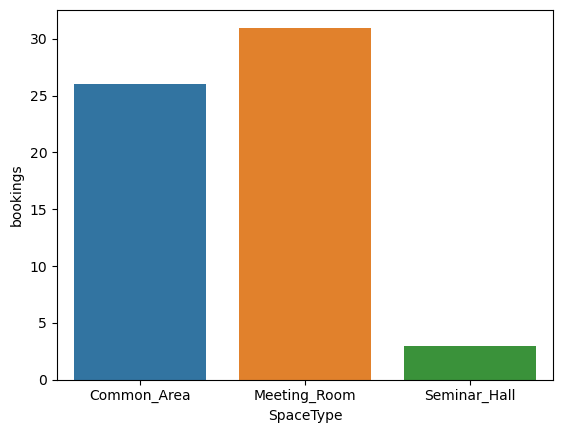

In [7]:
sns.barplot(data=df1, x="SpaceType", y="bookings")

Meeting room SpaceType is most booked during the said time.

### Query 2: Which are the top 5 corporate with the maximum number of employees ?

In [8]:
query_2 = """SELECT c2.* FROM
(SELECT c.CorporateName, COUNT(e.Id) num_employees
FROM corporate c
JOIN employees e ON e.CorporateId = c.Id
GROUP BY c.CorporateName) c2
WHERE 5>
(SELECT COUNT(*) FROM
(SELECT c.CorporateName, COUNT(e.Id) num_employees
FROM corporate c
JOIN employees e ON e.CorporateId = c.Id
GROUP BY c.CorporateName) c1
WHERE c1.num_employees>c2.num_employees)
ORDER BY c2.num_employees DESC"""

In [9]:
df2 = pd.read_sql_query(query_2, conn)
df2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CorporateName,num_employees
0,Quinu,63
1,Thoughtmix,45
2,Livetube,32
3,Jazzy,30
4,Mydeo,30


<BarContainer object of 5 artists>

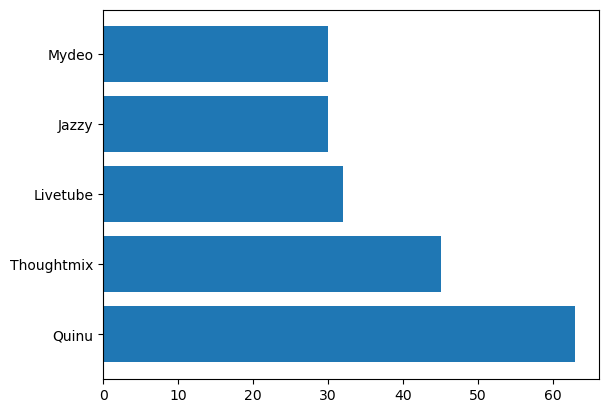

In [10]:
plt.barh( df2.loc[:,'CorporateName'], df2.loc[:,'num_employees'])

Amongst the Top 5 companies with highest number of employees, Quinu has the maximum employees

### Query 3: Analysis to find which building is generating maximum revenue ?

In [11]:
query_3 = """SELECT CONCAT(b1.BuildingNumber, ", ", b1.StreetName, " ", b1.StreetSuffix, ", ",
b1.Neighbourhood, " - ", b1.ZipCode ) BuildingAddress, t.* 
FROM
(SELECT s.BuildingId, SUM(i.TotalBillingCost) total_revenue
FROM invoice i
JOIN spacebooking sb ON sb.Id = i.SpaceBookingId
JOIN spaces s ON s.Id = sb.SpaceId
JOIN building b ON b.Id = s.BuildingId
GROUP BY s.BuildingId
ORDER BY total_revenue DESC
LIMIT 1) t
JOIN building b1 ON b1.Id = t.BuildingId"""

In [12]:
df3 = pd.read_sql_query(query_3, conn)
df3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,BuildingAddress,BuildingId,total_revenue
0,"114, Alpha Avenue, Waltham - 02111",399,672.6


In [13]:
query_4 = """SELECT SUM(i.TotalBillingCost) revenue
FROM invoice i"""

In [14]:
df4 = pd.read_sql_query(query_4,conn)
df4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,revenue
0,6865.12


In [15]:
print("{} is generating {}% of revenue for SmartSpaces".format(df3.loc[0,"BuildingAddress"], round((df3.loc[0,"total_revenue"]/df4.loc[0,"revenue"])*100.00,2)))

114, Alpha Avenue, Waltham - 02111 is generating 9.8% of revenue for SmartSpaces


### Query 4:  Analysis to understand the contribution of services towards revenue

In [16]:
query_5 = """SELECT s.Type, SUM(sb.QuantityRequested * s.ServiceCost) service_revenue
FROM service s
JOIN servicebooking sb ON sb.ServiceId = s.Id
GROUP BY s.Type
ORDER BY service_revenue DESC"""

In [17]:
df5 = pd.read_sql_query(query_5,conn)
df5

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Type,service_revenue
0,8-hour-Parking,172.0
1,Gym,114.0
2,3-hour-Parking,114.0
3,Pantry-Food,111.0
4,Pantry-Beverage,51.0
5,Scanning,8.9
6,Printing,6.6


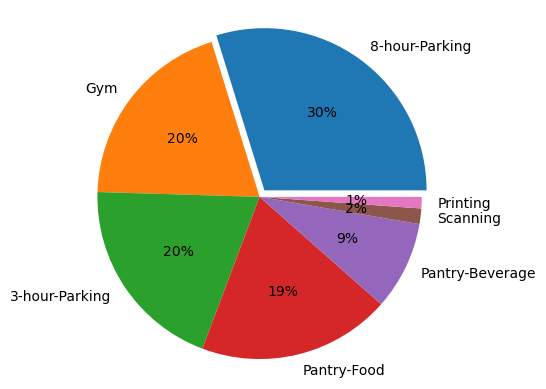

In [18]:
# Pie Plot
exp_list = [0.05,0,0,0,0,0,0]
plt.pie(df5.service_revenue, labels=df5.Type, autopct='%.0f%%', explode = exp_list)
plt.axis('equal')
plt.show()

This analysis shows that 8-hour-Parking is generating maximum revenue amongst services for SmartSpaces. This suggests that SmartSpaces should expand their venture amongst buildings which have Parking spaces

In [19]:
conn.close()